<a href="https://colab.research.google.com/github/Mitsko/AILabs/blob/master/first_part.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import csv
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
df = pd.read_csv("/content/drive/My Drive/InputData/Davis.csv")
msk = np.random.rand(len(df)) <= 0.5
train = df[msk]
test = df[~msk]
test.head()

,Unnamed: 0,sex,weight,height,repwt,repht
3,4,M,68,177,70.0,175.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
9,10,M,65,171,64.0,170.0
11,12,F,166,57,56.0,163.0


In [102]:
mask = []
for val in train.itertuples():
  index = val.weight / pow((val.height / 100),2)
  mask.append(index < 45 and index > 16)
train = train[mask]
mask.clear() 
for val in test.itertuples():
  index = val.weight / pow((val.height / 100),2)
  mask.append(index < 45 and index > 16)
test = test[mask]
test.itertuples
test.head()

,Unnamed: 0,sex,weight,height,repwt,repht
3,4,M,68,177,70.0,175.0
5,6,M,76,170,76.0,165.0
6,7,M,76,167,77.0,165.0
9,10,M,65,171,64.0,170.0
13,14,F,64,168,64.0,165.0


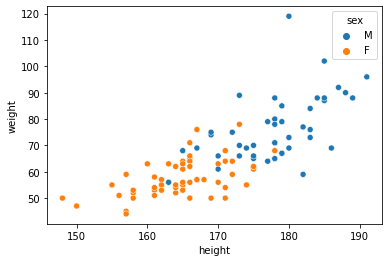

In [103]:
sns.scatterplot(x='height', y='weight', hue='sex', data=train)

In [104]:
male_train = train[train["sex"] == "M"]
female_train = train[train["sex"] == "F"]

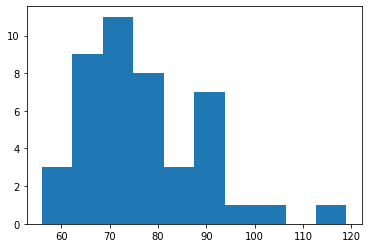

In [105]:
plt.hist(male_train.weight)
plt.show()

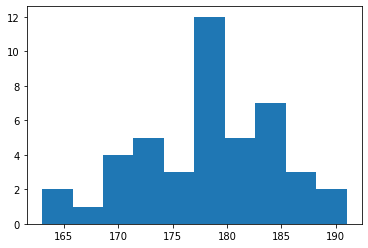

In [106]:
plt.hist(male_train.height)
plt.show()

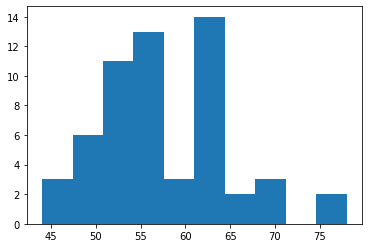

In [107]:
plt.hist(female_train.weight)
plt.show()

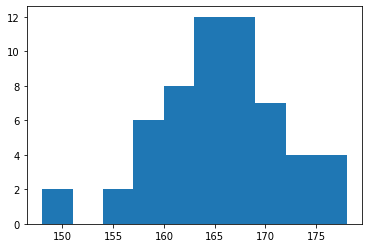

In [108]:
plt.hist(female_train.height)
plt.show()

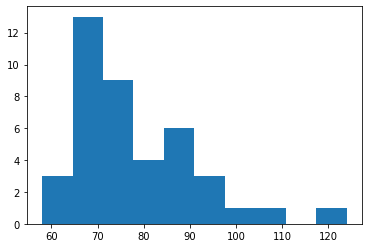

In [109]:
plt.hist(male_train.repwt)
plt.show()

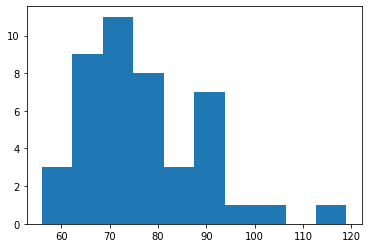

In [110]:
plt.hist(male_train.weight)
plt.show()

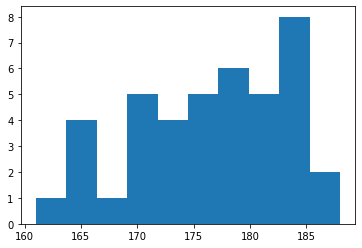

In [111]:
plt.hist(male_train.repht)
plt.show()

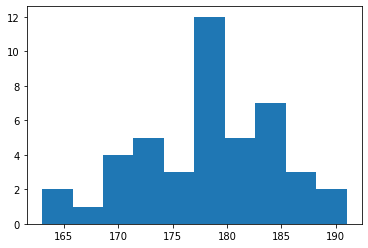

In [112]:
plt.hist(male_train.height)
plt.show()

In [113]:
import scipy.stats
class PointGenerator:
  def __init__(self):
    #Средние значения
    self.av_train={
      "M":None,
      "F":None
    }
    # Ковариационные матрицы распределения
    self.cov_train={
      "M":None,
      "F":None
    }
    self.p_male = None
  
  def fit(self,  x_train):
    self.x_train = x_train
    male_train = train[train["sex"] == "M"]
    female_train = train[train["sex"] == "F"]
    self.p_male = len(x_train[train["sex"] == "F"])/len(x_train)
    self.av_train["M"]=np.mean(male_train["height"]),np.mean(male_train["weight"])
    self.av_train["F"]=np.mean(female_train["height"]),np.mean(female_train["weight"]) 

    self.cov_train["M"] = np.cov(male_train["height"].to_numpy(),male_train["weight"].to_numpy())
    self.cov_train["F"] = np.cov(female_train["height"].to_numpy(),female_train["weight"].to_numpy())
  
  def generate_points(self, n_points):
    resHeight = []
    resWeight = []
    resSex = []
    for i in range (100):
      sex = self.generate_sex(self.p_male)
      height, weight = np.random.multivariate_normal([self.av_train[sex][0],self.av_train[sex][1]],self.cov_train[sex])
      resHeight.append((height))
      resWeight.append((weight))
      resSex.append((sex))
    result = {"sex":resSex,"height":resHeight,"weight":resWeight}
    davis_gen = pd.DataFrame(result)
    return davis_gen

  def generate_sex(self, pm):
    x=np.random.uniform(0,100)
    if x <= pm*100:
        sex = "M"
    else:
        sex = "F"
    return sex 
  
  def log_likelihood(self, X):
    sex = X["sex"]
    M = np.column_stack((X["height"], X["weight"]))
    return np.log(scipy.stats.multivariate_normal.pdf(M, self.av_train[sex], self.cov_train[sex]))
  
  def mean_log_likelihood(self,X):
    result = 0
    for index, row in X.iterrows():
      result += self.log_likelihood(row)
    return result/len(X)


-6.633871846319334
-6.682667263606478
-6.571033995224076


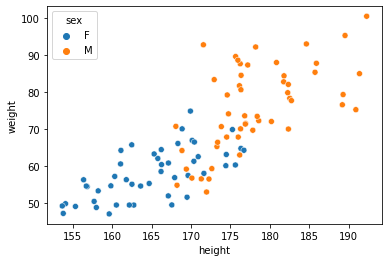

In [114]:
pGen = PointGenerator()
pGen.fit(train)
points = pGen.generate_points(len(train))
sns.scatterplot(x='height', y='weight', hue='sex', data=points)
print(pGen.mean_log_likelihood(points))
print(pGen.mean_log_likelihood(train))
print(pGen.mean_log_likelihood(test))

Сделаем нормализацию данных, для начала посчитаем среднее квадратичное отклоение, а затем проведем централизацию данных


In [115]:
trainX = train["height"]
trainY = train["weight"]
Dx = np.sum(trainX**2) / (len(trainX)-1)
Dy = np.sum(trainY**2) / (len(trainX)-1)
trainX = (trainX - trainX.mean()) / np.sqrt(Dx)
trainY = (trainY - trainY.mean()) / np.sqrt(Dy)
np.min(trainY)
#sko = (train - trainMean)/sko**(1/2)

-0.3236717640418077

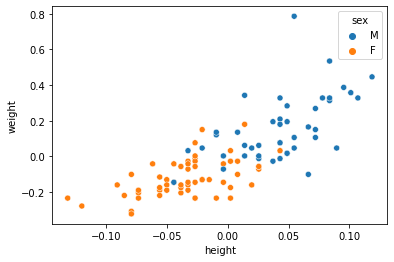

In [116]:
sns.scatterplot(x=trainX, y=trainY, hue=train['sex'])

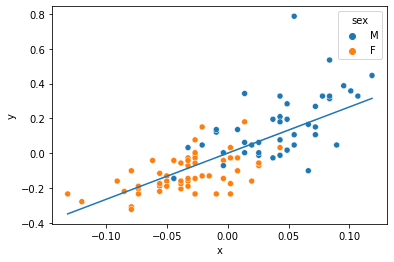

In [117]:
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e?gi=d6d7d34dbc77
np.random.seed(1337)
w1 = np.random.randn(1)
b = np.random.randn(1)
lr = 0.1 #find experemently (with values more than that const we not found minimal of error function)
n_epoch = 5000
w_hist = []
b_hist = []
height_train = trainX
weight_train = trainY
for epoch in range(n_epoch):
  w_hist.append(w1)
  b_hist.append(b)
  weight_res = w1 * height_train + b
  error = weight_train - weight_res
  #errors.append(error.mean())
  grad_w1 = -2 * (height_train * error).mean()
  grad_b = -2 * error.mean()
  w1 = w1 - lr * grad_w1
  b = b - lr * grad_b
  w_hist.append(w1)
  b_hist.append(b)
#print (b)
result = {"x":height_train,"y":w1 * height_train + b}
resultLine = pd.DataFrame(result)
sns.lineplot(data=resultLine, x="x", y="y")
sns.scatterplot(x=trainX, y=trainY, hue=train["sex"])

Посмотрим на обучения на чистых данных 

[0.39294783] [-0.83655975]


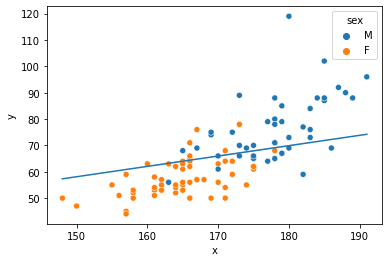

In [118]:
#https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e?gi=d6d7d34dbc77
np.random.seed(1337)
w1 = np.random.randn(1)
b = np.random.randn(1)
lr = 0.00001 #find experemently (with values more than that const we not found minimal of error function)
n_epoch = 50000
#w_hist = []
#b_hist = []
height_train = train['height']
weight_train = train['weight']
for epoch in range(n_epoch):
  #w_hist.append(w1)
  #b_hist.append(b)
  weight_res = w1 * height_train + b
  error = weight_train - weight_res
  #errors.append(error.mean())
  grad_w1 = -2 * (height_train * error).mean()
  grad_b = -2 * error.mean()
  w1 = w1 - lr * grad_w1
  b = b - lr * grad_b
  #w_hist.append(w1)
  #b_hist.append(b)
print (w1, b)
result = {"x":height_train,"y":w1 * height_train + b}
resultLine = pd.DataFrame(result)
sns.lineplot(data=resultLine, x="x", y="y")
sns.scatterplot(x="height", y="weight", hue=train["sex"], data=train)

In [119]:
def gradient(hTrain, wTrain,w,b):
  error = 0.0
  error = (wTrain - (w*hTrain + b))**2
  return error.mean()


In [120]:
w1,b = np.mgrid[-0.2:1:200j,-0.2:1:200j]

mse_vals  = np.zeros(shape = (200,200))
for i in range(-100,100,1):
    for j in range(-100,100,1):
        mse_vals[i,j] = gradient(train["height"], train['weight'], i, j)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


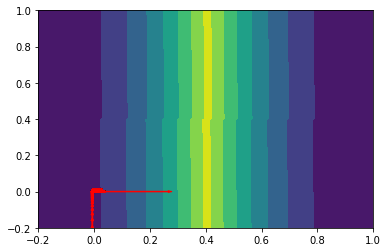

In [121]:
plt.contourf(w1, b, mse_vals)
ax = plt.axes()
for i in range(len(w_hist)):
  w_hist[i][0] = w_hist[i][0]/10
for i in range(0, len(w_hist)-1, 1):
  ax.arrow(w_hist[i][0], b_hist[i][0],w_hist[i+1][0] - w_hist[i][0], b_hist[i+1][0] - b_hist[i][0], color='RED',width=0.003)